In [11]:

import numpy as np 
import cv2 as cv
from matplotlib import pyplot as plt 
from fonctions import *

Question1

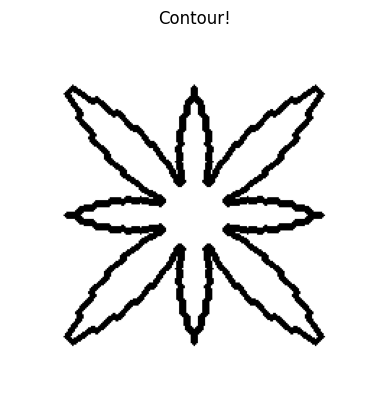

In [12]:

image = cv.imread('device2-16(1).bmp',1) 
image_gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
threshold , images_edges = cv.threshold(image_gray,100,255,cv.THRESH_BINARY)
canvas = np.zeros(image.shape , np.uint8)
canvas.fill(255)

mask = np.zeros(image.shape , np.uint8)
mask.fill(255)

contours_draw ,hierachy = cv.findContours(images_edges,cv.RETR_LIST,cv.CHAIN_APPROX_NONE)
contours_mask ,hierachy = cv.findContours(images_edges,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_NONE)
cv.drawContours(canvas,contours_draw,-1,(0,0,0),3)
for i in range(len(contours_draw)):
    cv.drawContours(canvas,contours_mask,i,(0,0,0),3)

for i in range(len(contours_mask)):
    cv.drawContours(mask,contours_mask,i,(0,0,0),3)
   
    

# cv.imshow('contour',mask)

plt.imshow(mask, cmap="gray");plt.title("Contour!");plt.axis("off");


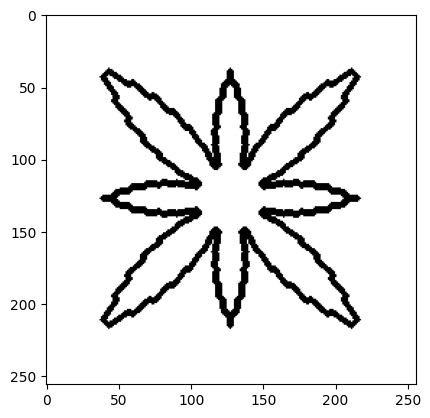

In [13]:
plt.imshow(mask[..., ::-1])



In [14]:

def partition_contour(contour, epsilon):
   
    segments = [[contour[0]]]
    

    for i in range(1, len(contour)):
        segment = segments[-1]
        last_point = segment[-1]
        distance = point_to_segment_distance(contour[i], segment[0], last_point)
        if distance > epsilon:
            segment.append(contour[i])
        else:
            segments.append([contour[i]])

    return segments
def point_to_segment_distance(point, start, end):
   
    u = np.array(point) - np.array(start)
    v = np.array(end) - np.array(start)
    v_length = np.linalg.norm(v)
    if v_length == 0:
        return np.linalg.norm(u)
    else:
        dot = np.dot(u, v)
        projection = dot / v_length

In [15]:
# contours_mask
segments = partition_contour(contours_mask,0.5)
print(segments[0][0])

[[[43 39]]

 [[42 40]]

 [[41 41]]

 ...

 [[46 41]]

 [[45 40]]

 [[44 40]]]


1312


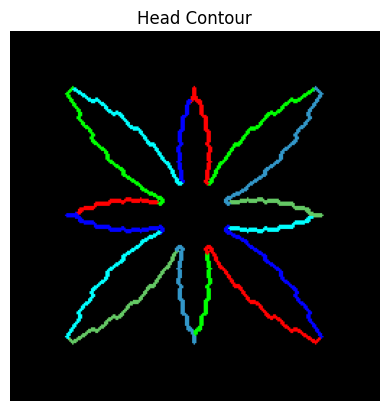

In [16]:
print(len(contours_mask[0]))
l=data = list(  range( 0,1312 ,150) )

l=[0,100,160,240,330,420,500,560,660,755,820,890,990,1080,1160,1220,1312]
parts_ = partitionement(contours_mask[0],l)

head = np.zeros(image.shape,np.uint8)
colors = [(0,255,0),(255,0,0),(0,0,255),(0,255,255),(100,200,100),(50,150,200),(30,2,100)]
i=0
for part in parts_: 
    cv.drawContours(head,part,-1,colors[i],2)    
    plt.imshow(head, cmap="gray");plt.title("Head Contour");plt.axis("off");
    i+=1
    if i==6: i =0
    # 90,90,80,60
# print(parts_)

[103 102 101 100  99  98  97  96  95  94  93  92  91  91  90  89  88  87
  86  85]
[139 139 140 141 141 142 142 142 143 144 144 145 145 146 147 148 149 149
 150 151]
[ 30.          31.42857143  32.85714286  34.28571429  35.71428571
  37.14285714  38.57142857  40.          41.42857143  42.85714286
  44.28571429  45.71428571  47.14285714  48.57142857  50.
  51.42857143  52.85714286  54.28571429  55.71428571  57.14285714
  58.57142857  60.          61.42857143  62.85714286  64.28571429
  65.71428571  67.14285714  68.57142857  70.          71.42857143
  72.85714286  74.28571429  75.71428571  77.14285714  78.57142857
  80.          81.42857143  82.85714286  84.28571429  85.71428571
  87.14285714  88.57142857  90.          91.42857143  92.85714286
  94.28571429  95.71428571  97.14285714  98.57142857 100.        ]


/home/wr/Documents/Uni HPC/analyse numerique/Tp/PROJET AN/Projet/NA_project/fonctions.py:41: RuntimeWarning: divide by zero encountered in double_scalars
  (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
/home/wr/Documents/Uni HPC/analyse numerique/Tp/PROJET AN/Projet/NA_project/fonctions.py:50: RuntimeWarning: invalid value encountered in add
  p = coef[n-k] + (x -x_data[n-k])*p
/home/wr/Documents/Uni HPC/analyse numerique/Tp/PROJET AN/Projet/NA_project/fonctions.py:50: RuntimeWarning: invalid value encountered in multiply
  p = coef[n-k] + (x -x_data[n-k])*p


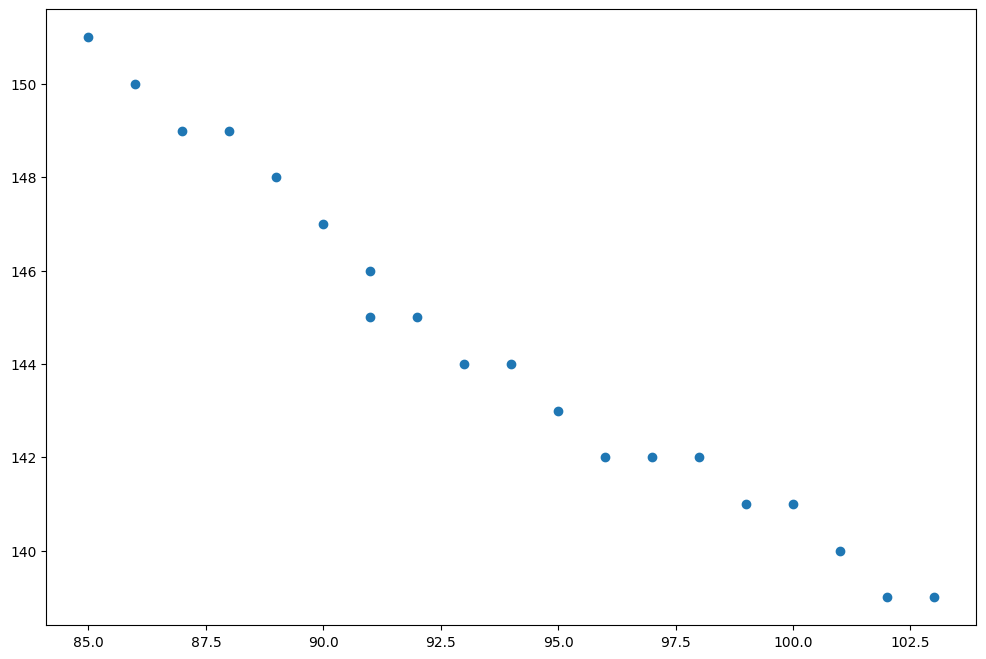

In [18]:

# 

XY= ContourXY(parts_[3])
x =np.array(XY[0])[0:20]
y=np.array(XY[1])[0:20]
print(x)
print(y)
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# X = np.linspace(min(x),max(x),50)
# evaluate on new data points
# x_new = np.linspace(min(x),max(x),50)
x_new = np.linspace(30,100)
print(x_new)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.scatter(x,y)
plt.plot(x_new, y_new)

        

[-20.  -8.  -3.  -2.  -2.   0.   7.]
[-42.     -12.9375  -3.      -2.0625   0.    ]


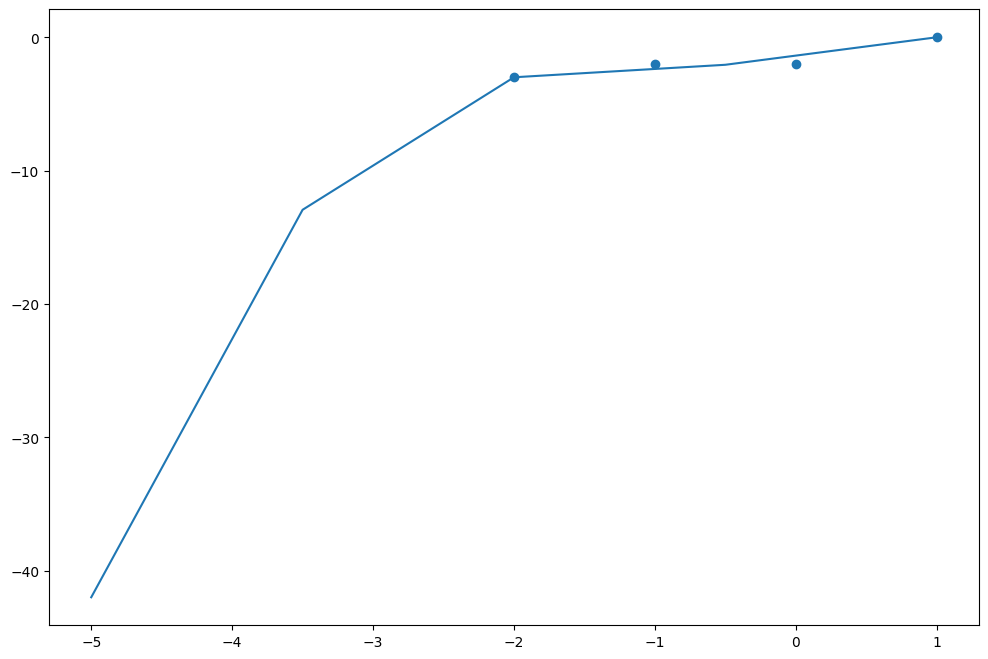

In [19]:
XY= ContourXY(parts_[4])
x = [-2,-1,0,1]
y=[-3,-2,-2,0]

# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# X = np.linspace(min(x),max(x),50)
# evaluate on new data points
# x_new = np.linspace(min(x),max(x),50)
x_new = np.linspace(-5,1,5)
xx=np.array([-4,-3,-2,-1,0,1,2])
yy=newton_poly(a_s, x, xx)
print(yy)
y_new = newton_poly(a_s, x, x_new)
print(y_new)
plt.figure(figsize = (12, 8))
plt.scatter(x,y)
plt.plot(x_new, y_new)

        

moindre carre 

[-8.14461293e-05  1.16647394e-02 -1.06924573e+00  2.44839703e+02]


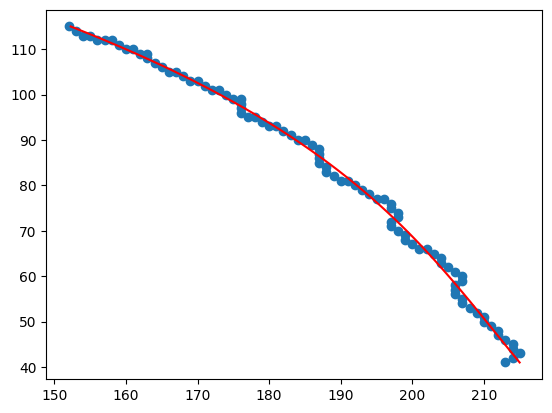

In [20]:
from fonctions import *
x =np.array(XY[0])
y=np.array(XY[1])
plt.scatter(y,x)

degree = 3
coeffs = least_squares_approximation(x, y, degree)
# coeffs = least_squares_approximation([-2,-1,0,1], [-3,-2,-2,0], 2)
print(coeffs)

f = np.poly1d(coeffs)
X = np.linspace(min(x),max(x),50)
plt.plot([f(i) for i in X],X,color='red')


calcul Errors

In [21]:

def calculate_error_norms(original_segment, approximated_curve):
    error = original_segment - approximated_curve
    L1_norm = np.sum(np.abs(error))
    L2_norm = np.sqrt(np.sum(error**2))
    Linf_norm = np.max(np.abs(error))
    return L1_norm, L2_norm, Linf_norm

In [22]:

print(len(parts_[4]))
approximated_curve=[]
original_segment = parts_[4] 
X = np.linspace(min(x),max(x),90)
for i in range(len(parts_[4])):
  point =[]
  point.append(X[i])
  point.append(f(X[i]))
  approximated_curve.append(point)

90


In [23]:

L1_norm, L2_norm, Linf_norm = calculate_error_norms(original_segment, approximated_curve)
print("L1 norm:", L1_norm)
print("L2 norm:", L2_norm)
print("Linf norm:", Linf_norm)

L1 norm: 371753.6587339764
L2 norm: 3608.276393297996
Linf norm: 74.0


image complete moindre carre 

16


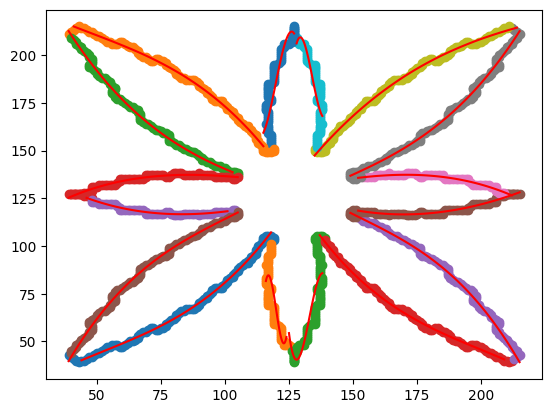

In [24]:
print(len(parts_))
for part in parts_: 
    XY= ContourXY(part)
    x =XY[0]
    y=XY[1]
    coeffs = least_squares_approximation(x, y, degree)
    f = np.poly1d(coeffs)
    
    plt.scatter(y,x)
    X = np.linspace(min(x),max(x),50)
    plt.plot(X,[f(i) for i in X],color='red')

image complete laragnge 

16
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
-94.71951406493775
193.99350560909815
193.99350560909815
193.99350

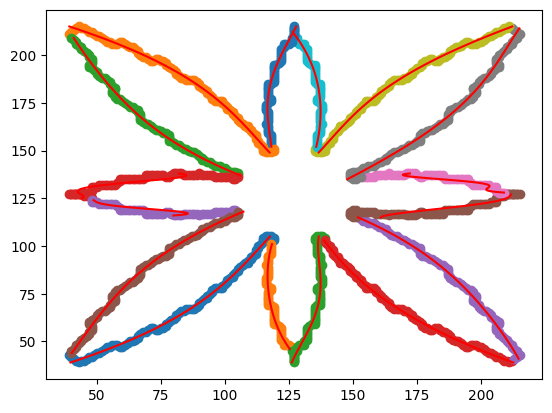

In [25]:

print(len(parts_))
for part in parts_: 
    XY= ContourXY(part)
    x =XY[0]
    y=XY[1]
    # print(x)
    plt.scatter(y,x)
    X = np.linspace(min(x),max(x),50)
    plt.plot([P(i,x,y,4) for i in X],X,color='red')
    

APPLE 

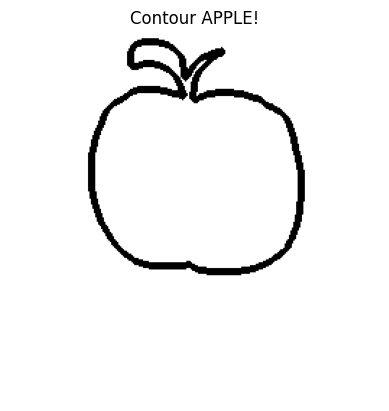

In [26]:


image_apple = cv.imread('apple-4.bmp',1) 
image_gray_apple = cv.cvtColor(image_apple,cv.COLOR_BGR2GRAY)
threshold_apple , images_edges_apple = cv.threshold(image_gray_apple,100,255,cv.THRESH_BINARY)
canvas_apple = np.zeros(image_apple.shape , np.uint8)
canvas_apple.fill(255)

mask_apple = np.zeros(image_apple.shape , np.uint8)
mask_apple.fill(255)

contours_draw_apple ,hierachy_apple = cv.findContours(images_edges_apple,cv.RETR_LIST,cv.CHAIN_APPROX_NONE)
contours_mask_apple ,hierachy_apple = cv.findContours(images_edges_apple,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_NONE)
cv.drawContours(canvas_apple,contours_draw_apple,-1,(0,0,0),3)
for i in range(len(contours_draw_apple)):
    cv.drawContours(canvas_apple,contours_mask_apple,i,(0,0,0),3)

for i in range(len(contours_mask_apple)):
    cv.drawContours(mask_apple,contours_mask_apple,i,(0,0,0),3)
plt.imshow(mask_apple, cmap="gray");plt.title("Contour APPLE!");plt.axis("off");


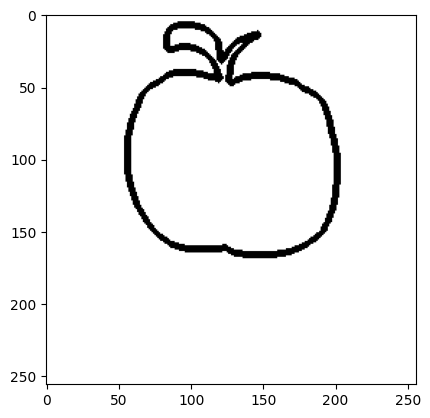

In [27]:
plt.imshow(mask_apple[..., ::-1])


590
[0, 20, 50, 60, 65, 150, 190, 250, 300, 350, 370, 400, 430, 450, 485, 500, 520, 548, 600]
18


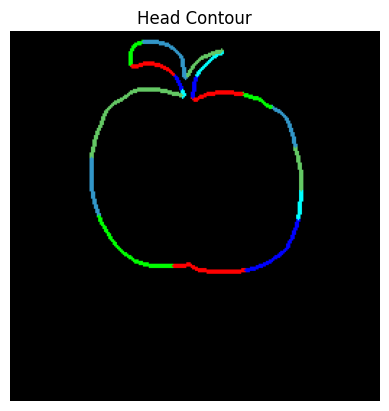

In [28]:
print(len(contours_mask_apple[0]))
l=data = list(  range( 0,600 ,5) )
l2=list(  range( 0,600 ,10) )
l=[0,20, 50,60,65, 150,190, 250, 300, 350,370, 400,430,450,485,500,520,548,600]
print(l)
parts_apple = partitionement(contours_mask_apple[0],l)
print(len(parts_apple))
head_apple = np.zeros(image_apple.shape,np.uint8)
colors =  [(0,255,0),(255,0,0),(0,0,255),(0,255,255),(100,200,100),(50,150,200),(30,2,100)]
i=0
for part in parts_apple: 
    cv.drawContours(head_apple,part,-1,colors[i],2)    
    plt.imshow(head_apple, cmap="gray");plt.title("Head Contour");plt.axis("off");
    i+=1
    if i==6: i =0
    # 90,90,80,60

# print(parts_)

moindre caree

18


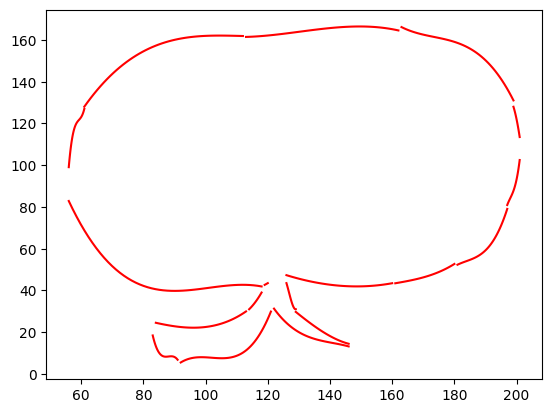

In [29]:
print(len(parts_apple))
for part in parts_apple: 
    XY= ContourXY(part)
    x =XY[0]
    y=XY[1]
    coeffs = least_squares_approximation(x, y, degree)
    f = np.poly1d(coeffs)
    
    # plt.scatter(x,y)
    X = np.linspace(min(x),max(x),50)
    plt.plot(X,[f(i) for i in X],color='red')

lagarnge 

83 91
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
801688.3114514189
84 113
-2300.6869046381444
-2300.6869046381444
-2300.6869046381444
-2300.6869046381444
-2300.6

/tmp/ipykernel_116143/2345414077.py:9: RankWarning: Polyfit may be poorly conditioned
  plt.plot([P(i,x,y,4) for i in X],X,color='blue',)
/tmp/ipykernel_116143/2345414077.py:9: RankWarning: Polyfit may be poorly conditioned
  plt.plot([P(i,x,y,4) for i in X],X,color='blue',)
/tmp/ipykernel_116143/2345414077.py:9: RankWarning: Polyfit may be poorly conditioned
  plt.plot([P(i,x,y,4) for i in X],X,color='blue',)
/tmp/ipykernel_116143/2345414077.py:9: RankWarning: Polyfit may be poorly conditioned
  plt.plot([P(i,x,y,4) for i in X],X,color='blue',)
/tmp/ipykernel_116143/2345414077.py:9: RankWarning: Polyfit may be poorly conditioned
  plt.plot([P(i,x,y,4) for i in X],X,color='blue',)
/tmp/ipykernel_116143/2345414077.py:9: RankWarning: Polyfit may be poorly conditioned
  plt.plot([P(i,x,y,4) for i in X],X,color='blue',)
/tmp/ipykernel_116143/2345414077.py:9: RankWarning: Polyfit may be poorly conditioned
  plt.plot([P(i,x,y,4) for i in X],X,color='blue',)
/tmp/ipykernel_116143/2345414077.p

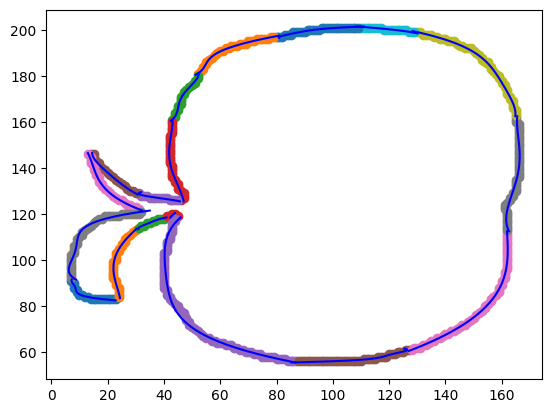

In [30]:


for part in parts_apple: 
    XY= ContourXY(part)
    x =XY[0]
    y=XY[1]
    # print(x)
    plt.scatter(y,x)
    print(min(x),max(x))
    X = np.linspace(min(x)-0.5,max(x)+0.5,50)
    plt.plot([P(i,x,y,4) for i in X],X,color='blue',)
    